<a href="https://colab.research.google.com/github/Sakthisaba/MoodSwing/blob/main/ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import keras
import numpy as np
from keras import optimizers, models, layers
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPool2D, BatchNormalization, Activation

from keras.preprocessing.image import ImageDataGenerator

In [ ]:
!pip3 install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import zipfile

In [ ]:
!unzip "/content/drive/MyDrive/train2.zip"
!unzip "/content/drive/MyDrive/validation2.zip"


Streaming output truncated to the last 5000 lines.
 extracting: train1/train/Surprise/2084.jpg  
 extracting: train1/train/Surprise/2085.jpg  
 extracting: train1/train/Surprise/2086.jpg  
 extracting: train1/train/Surprise/2087.jpg  
 extracting: train1/train/Surprise/2088.jpg  
 extracting: train1/train/Surprise/2089.jpg  
 extracting: train1/train/Surprise/209.jpg  
 extracting: train1/train/Surprise/2090.jpg  
 extracting: train1/train/Surprise/2091.jpg  
 extracting: train1/train/Surprise/2092.jpg  
 extracting: train1/train/Surprise/2093.jpg  
 extracting: train1/train/Surprise/2094.jpg  
 extracting: train1/train/Surprise/2095.jpg  
 extracting: train1/train/Surprise/2096.jpg  
 extracting: train1/train/Surprise/2097.jpg  
 extracting: train1/train/Surprise/2098.jpg  
 extracting: train1/train/Surprise/2099.jpg  
 extracting: train1/train/Surprise/21.jpg  
 extracting: train1/train/Surprise/210.jpg  
 extracting: train1/train/Surprise/2100.jpg  
 extracting: train1/train/Surpris

In [ ]:
train_dir = "/content/train1/train"
val_dir = "/content/validation1/validation"

In [ ]:
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(48, 48)


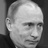

In [ ]:
img = Image.open("/content/train1/train/Angry/10.jpg")
print(img.size)
img

In [ ]:
classes = dict()
reverse_classes = dict()
count = 0
for folder in os.listdir("/content/train1/train"):
    classes[folder] = count
    reverse_classes[count] = img
    count = count + 1

reverse_classes[4]
classes



{'Angry': 0, 'Happy': 3, 'Neutral': 4, 'Sad': 2, 'Surprise': 1}

In [ ]:
BATCH_SIZE = 64

    
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   shear_range=0.3,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   zoom_range=0.3,
                                   horizontal_flip=True,
                                   fill_mode="nearest")
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    color_mode='grayscale',
                                                    target_size=(48, 48),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical',
                                                    shuffle=True)

val_generator = val_datagen.flow_from_directory(val_dir,
                                                color_mode='grayscale',
                                                target_size=(48, 48),
                                                batch_size=BATCH_SIZE,
                                                class_mode='categorical',
                                                shuffle=True)


num_train = 24256
num_val = 3006

Found 24256 images belonging to 5 classes.
Found 3006 images belonging to 5 classes.


In [ ]:

model = models.Sequential([
    # Block 1
    # Leave strides as default since images are small
    Conv2D(32, (3, 3), padding="same", kernel_initializer="he_normal", input_shape=(48, 48, 1)),
    BatchNormalization(),
    Activation("relu"),
    Conv2D(32, (3, 3), padding="same", kernel_initializer="he_normal"),
    BatchNormalization(),
    Activation("relu"),
    MaxPool2D((2, 2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3, 3), padding="same", kernel_initializer="he_normal"),
    BatchNormalization(),
    Activation("relu"),
    Conv2D(64, (3, 3), padding="same", kernel_initializer="he_normal"),
    BatchNormalization(),
    Activation("relu"),
    MaxPool2D((2, 2)),
    Dropout(0.25),

    # Block 3dsgdh
    Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"),
    BatchNormalization(),
    Activation("relu"),
    Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"),
    BatchNormalization(),
    Activation("relu"),
    MaxPool2D((2, 2)),
    Dropout(0.25),

    # Block 4
    Conv2D(256, (3, 3), padding="same", kernel_initializer="he_normal"),
    BatchNormalization(),
    Activation("relu"),
    Conv2D(256, (3, 3), padding="same", kernel_initializer="he_normal"),
    BatchNormalization(),
    Activation("relu"),
    MaxPool2D((2, 2)),
    Dropout(0.25),

    # Block 5
    Flatten(),
    Dense(64, kernel_initializer="he_normal"),
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.5),

    # Block 6
    Dense(128, kernel_initializer="he_normal"),
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.5),

    # Output layer
  
    Dense(5, kernel_initializer="glorot_normal", activation="softmax")
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
Checkpoint = ModelCheckpoint("Emotion_Detector.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose=1)
Early_Stopping = EarlyStopping(monitor="val_loss",
                              min_delta=0,
                              patience=3,
                              verbose=1,
                              restore_best_weights=True)
Reduce_LR = ReduceLROnPlateau(monitor="val_loss",
                              factor=0.2, # Decrease by 20% each time
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

In [ ]:
history = model.fit(train_generator, 
                    steps_per_epoch=num_train//BATCH_SIZE,
                    epochs=25,
                    callbacks=[Checkpoint, Early_Stopping, Reduce_LR],
                    validation_data=val_generator,
                    validation_steps=num_val//BATCH_SIZE)

Epoch 1/25
379/379 [==============================] - ETA: 0s - loss: 1.7748 - accuracy: 0.2552
Epoch 1: val_loss improved from inf to 1.56201, saving model to Emotion_Detector.h5
379/379 [==============================] - 639s 2s/step - loss: 1.7748 - accuracy: 0.2552 - val_loss: 1.5620 - val_accuracy: 0.2914 - lr: 0.0010
Epoch 2/25
379/379 [==============================] - ETA: 0s - loss: 1.6019 - accuracy: 0.2793
Epoch 2: val_loss improved from 1.56201 to 1.54431, saving model to Emotion_Detector.h5
379/379 [==============================] - 608s 2s/step - loss: 1.6019 - accuracy: 0.2793 - val_loss: 1.5443 - val_accuracy: 0.2972 - lr: 0.0010
Epoch 3/25
379/379 [==============================] - ETA: 0s - loss: 1.5606 - accuracy: 0.2899
Epoch 3: val_loss did not improve from 1.54431
379/379 [==============================] - 616s 2s/step - loss: 1.5606 - accuracy: 0.2899 - val_loss: 1.5742 - val_accuracy: 0.2877 - lr: 0.0010
Epoch 4/25
379/379 [==============================] - ETA:

In [ ]:

model.save("Emotion_Detector.h5")




In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 48, 48, 32)        0

In [ ]:
#lst=["Angry","Surprise","Sad","Happy","Neutral"]

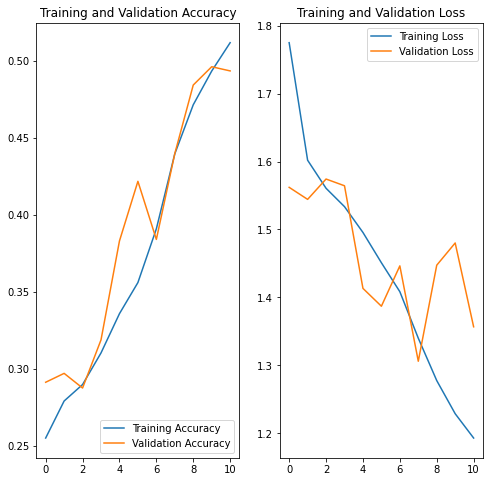

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(11)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# The model predicted the sample image accurately
image = Image.open("/content/WIN_20220611_12_00_24_Pro.jpg")
image = image.resize((48, 48))
arr = np.array(image)
x_data = [arr]
x_data = np.array(x_data, dtype = "float32")
x_data = x_data.reshape((len(x_data), 48, 48, 1))
x_data /= 255
pred_array = model.predict(x_data)
result = reverse_classes[np.argmax(pred_array)]
t =lst[np.argmax(pred_array)]
print(f" the image is of {t}")

# to display the image 
import matplotlib.pyplot as plt 
plt.imshow(image)
plt.title("input image")
plt.show()
pred_array

ValueError: ignored

In [ ]:
lst=["Angry","Happy","Sad","Sad","Neutral"]

